# 0.0. Imports

In [129]:
matplotlib.__version__

'3.4.3'

In [128]:
import matplotlib

## 0.1. Frameworks

In [107]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt

## 0.2. Config

In [108]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [25, 12]
plt.rcParams['font.size'] = 24
sns.set()

## 0.3. Data

In [109]:
df = pd.read_csv(r'./data/2021_survey_results.csv', sep=',') # import data

# 1.0. Describe Data

In [110]:
df1 = df.copy()

## 1.1. Columns / Rows

In [111]:
print(f'Rows: {df1.shape[0]}')
print(f'Columns: {df1.shape[1]}')

Rows: 83439
Columns: 48


## 1.2. Dtypes

In [112]:
df1.dtypes

ResponseId                        int64
MainBranch                       object
Employment                       object
Country                          object
US_State                         object
UK_Country                       object
EdLevel                          object
Age1stCode                       object
LearnCode                        object
YearsCode                        object
YearsCodePro                     object
DevType                          object
OrgSize                          object
Currency                         object
CompTotal                       float64
CompFreq                         object
LanguageHaveWorkedWith           object
LanguageWantToWorkWith           object
DatabaseHaveWorkedWith           object
DatabaseWantToWorkWith           object
PlatformHaveWorkedWith           object
PlatformWantToWorkWith           object
WebframeHaveWorkedWith           object
WebframeWantToWorkWith           object
MiscTechHaveWorkedWith           object


## 1.3. Null Values

In [113]:
df1.isnull().sum()

ResponseId                          0
MainBranch                          0
Employment                        116
Country                             0
US_State                        68519
UK_Country                      79021
EdLevel                           313
Age1stCode                        196
LearnCode                         476
YearsCode                        1798
YearsCodePro                    22223
DevType                         16955
OrgSize                         22713
Currency                        22359
CompTotal                       36256
CompFreq                        31289
LanguageHaveWorkedWith           1082
LanguageWantToWorkWith           6618
DatabaseHaveWorkedWith          13893
DatabaseWantToWorkWith          25140
PlatformHaveWorkedWith          31304
PlatformWantToWorkWith          41820
WebframeHaveWorkedWith          21732
WebframeWantToWorkWith          31344
MiscTechHaveWorkedWith          36384
MiscTechWantToWorkWith          45418
ToolsTechHav

# 2.0. Exploratory Data Analysis

In [115]:
df2 = df1.copy()

In [116]:
def count_list_series(df, column, sep=';'):
    """
    Input:
    df - pandas dataframe containing the column to be counted;
    column - columns with the list entries that must have the values counted;
    sep - the type of separator used in the list.
    
    Output:
    df - a new dataframe containing:
        Value: the name of the variable to be counted;
        Count: count of the variable;
        Percentage: the percentage of the value in relation to the number of lines.
    """
    final_list = []
    df_aux = df[column].dropna(axis=0)
    for index, value in enumerate(df_aux):
        list_languages = value.split(sep)
        for language in list_languages:
            final_list.append(language)
    value, counts = np.unique(final_list, return_counts=True)
    df_count = pd.DataFrame(counts, value).sort_values(by=0, ascending=False).reset_index().rename({'index': 'Value', 0: 'Count'}, axis=1)
    df_count['Percentage'] = round((100 * df_count['Count'] / len(df)), 2)
    return df_count

In [119]:
# drop na values
df_aux = df2.dropna(axis=0, subset=['DevType'])

# select only data scientists
df_aux = df_aux.loc[df_aux['DevType'] == 'Data scientist or machine learning specialist', :] 

## Q1 - What are the most used languages and tools by Data Scientists or machine learning especialists

<AxesSubplot:xlabel='Percentage', ylabel='Value'>

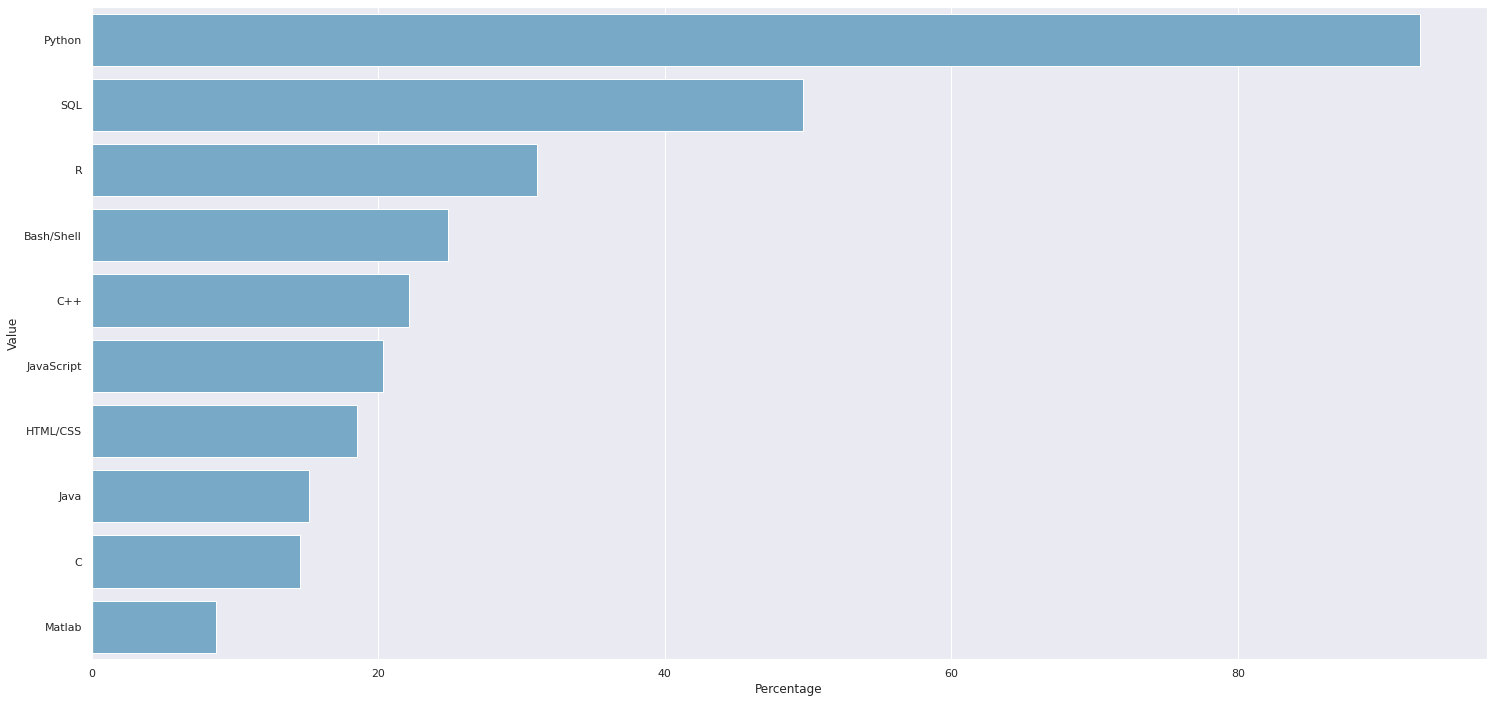

In [120]:
df_language = count_list_series(df=df_aux, column='LanguageHaveWorkedWith')
sns.barplot(x='Percentage', y='Value', data=df_language[:10], palette=sns.color_palette('Blues', 1))

<AxesSubplot:xlabel='Percentage', ylabel='Value'>

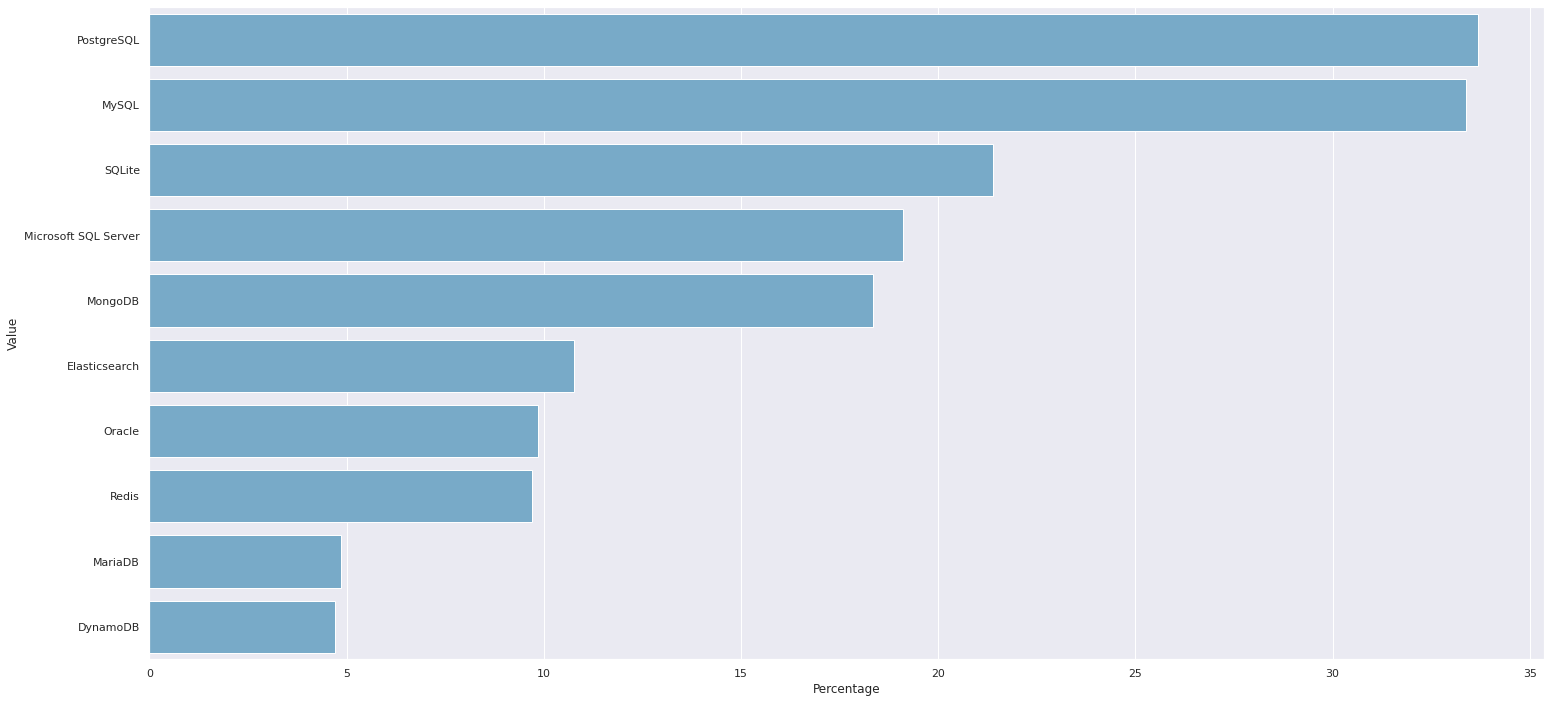

In [121]:
df_database = count_list_series(df=df_aux, column='DatabaseHaveWorkedWith')
sns.barplot(x='Percentage', y='Value', data=df_database[:10], palette=sns.color_palette('Blues', 1))

<AxesSubplot:xlabel='Percentage', ylabel='Value'>

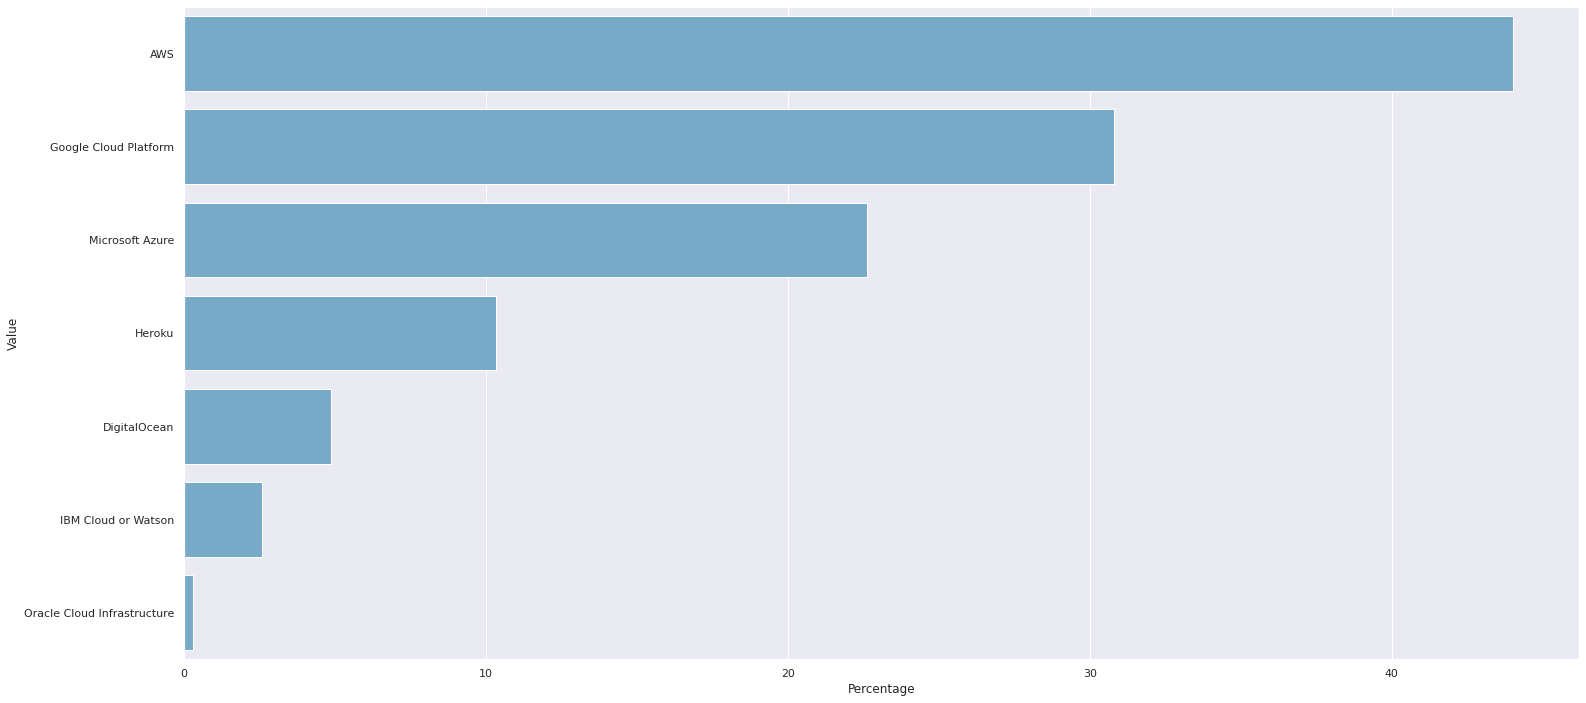

In [122]:
df_language = count_list_series(df=df_aux, column='PlatformHaveWorkedWith')
sns.barplot(x='Percentage', y='Value', data=df_language[:10], palette=sns.color_palette('Blues', 1))

## Q2 - How long have data scientists been programming

In [58]:
df_aux.loc[df_aux['YearsCode'] == 'Less than 1 year', 'YearsCode'] = 0
df_years_code = df_aux['YearsCode'].dropna().astype('int64')

<AxesSubplot:xlabel='YearsCode', ylabel='Density'>

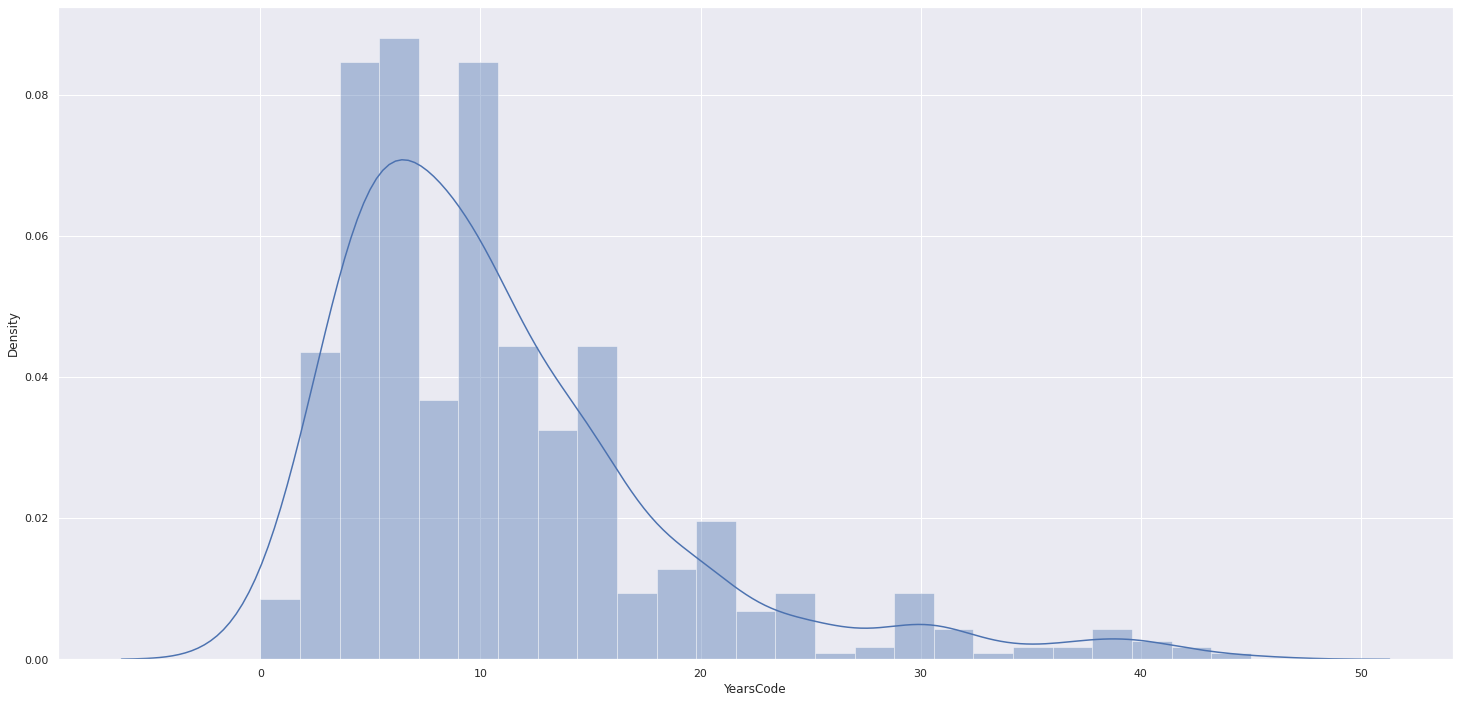

In [100]:
sns.distplot(df_years_code)

<AxesSubplot:xlabel='Years Group', ylabel='Percentage'>

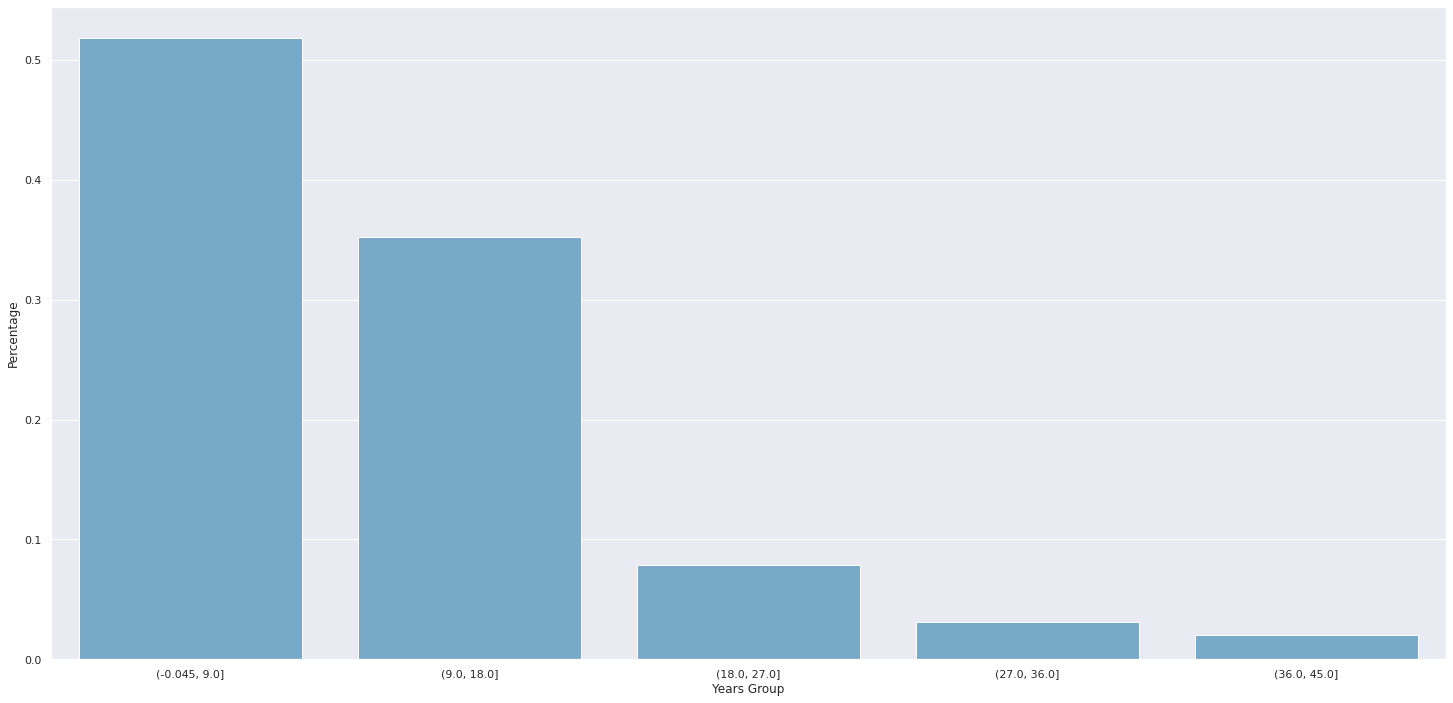

In [90]:
df_proportions_years_code = pd.cut(df_years_code, 5).value_counts(normalize=True).reset_index()
df_proportions_years_code.columns = ['Years Group', 'Percentage']

sns.barplot(data=df_proportions_years_code, x='Years Group', y='Percentage',
            palette=sns.color_palette('Blues', 1))

## Q3 - What's the average salary for Data Scientists or machine learning especialists

In [101]:
df_salary = df_aux[['Employment', 'ConvertedCompYearly']].groupby('Employment').mean().reset_index().sort_values(by='ConvertedCompYearly')

In [102]:
df_salary.dropna(inplace=True)

<AxesSubplot:xlabel='Employment', ylabel='ConvertedCompYearly'>

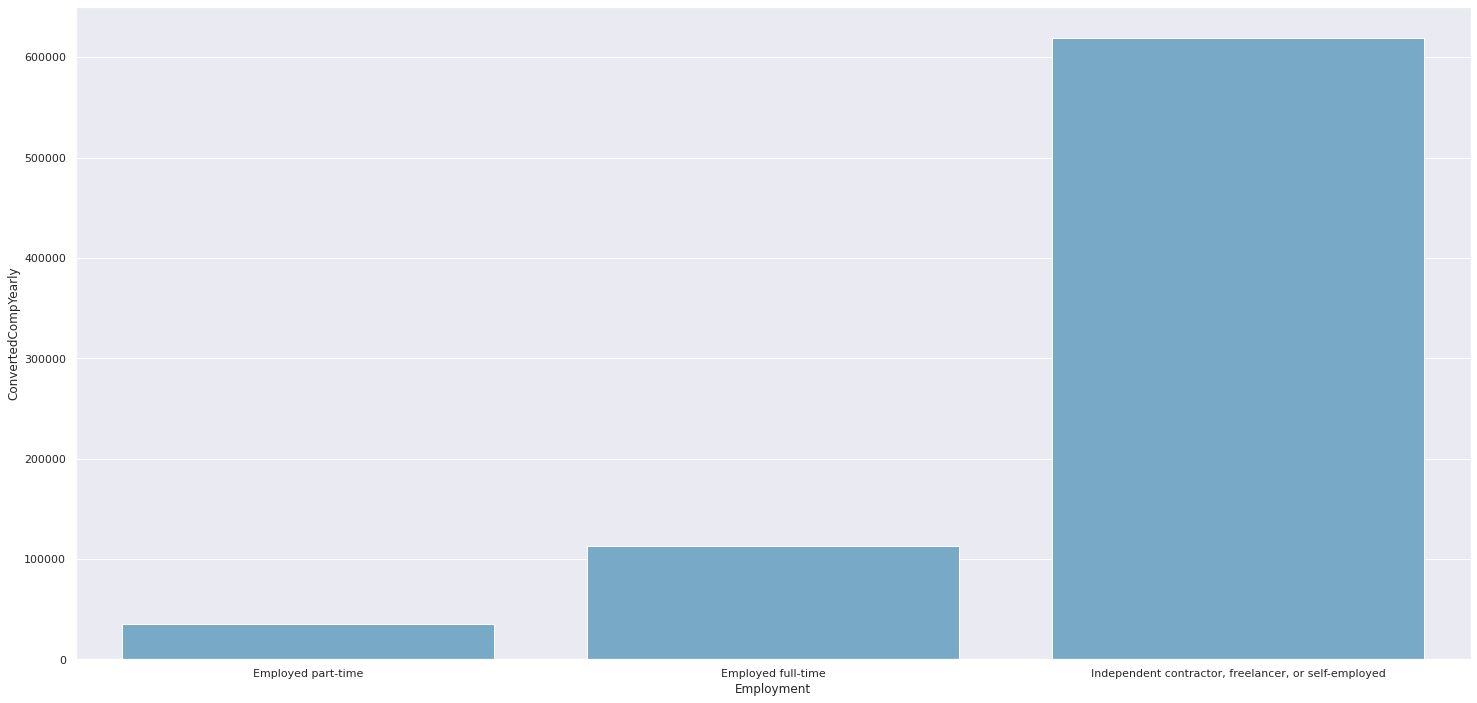

In [103]:
sns.barplot(x='Employment', y='ConvertedCompYearly', data=df_salary, 
            palette=sns.color_palette('Blues', 1))